In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
test = pd.read_csv(r'C:\Users\Vatsal\Desktop\projects\Data Sets\Self\Black-Friday-Data-master\test.csv')
train = pd.read_csv(r'C:\Users\Vatsal\Desktop\projects\Data Sets\Self\Black-Friday-Data-master\train.csv')

print('Train: ',train.shape)
print('Test: ',test.shape)
print()
print('Train: ',train.columns)
print('Test: ',test.columns)

Train:  (550068, 12)
Test:  (233599, 11)

Train:  Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')
Test:  Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object')


In [3]:
display(train.head(5), test.head(5))

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [4]:
display(train.isnull().sum(), test.isnull().sum())

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

In [5]:
display(train.dtypes, test.dtypes)

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
dtype: object

In [6]:
train.apply(lambda train:len(train.unique()))

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               18
Product_Category_3               16
Purchase                      18105
dtype: int64

In [7]:
test.apply(lambda test:len(test.unique()))

User_ID                       5891
Product_ID                    3491
Gender                           2
Age                              7
Occupation                      21
City_Category                    3
Stay_In_Current_City_Years       5
Marital_Status                   2
Product_Category_1              18
Product_Category_2              18
Product_Category_3              16
dtype: int64

In [8]:
train['source']='train'
test['source']='test'

In [9]:
df_main=pd.concat([test, train], ignore_index=True)
df_main.shape

(783667, 13)

In [10]:
df = pd.DataFrame(df_main)
print(df.shape)
print()
print(df.info())

(783667, 13)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 13 columns):
Age                           783667 non-null object
City_Category                 783667 non-null object
Gender                        783667 non-null object
Marital_Status                783667 non-null int64
Occupation                    783667 non-null int64
Product_Category_1            783667 non-null int64
Product_Category_2            537685 non-null float64
Product_Category_3            237858 non-null float64
Product_ID                    783667 non-null object
Purchase                      550068 non-null float64
Stay_In_Current_City_Years    783667 non-null object
User_ID                       783667 non-null int64
source                        783667 non-null object
dtypes: float64(3), int64(4), object(6)
memory usage: 77.7+ MB
None


In [11]:
df.isnull().sum()

Age                                0
City_Category                      0
Gender                             0
Marital_Status                     0
Occupation                         0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Product_ID                         0
Purchase                      233599
Stay_In_Current_City_Years         0
User_ID                            0
source                             0
dtype: int64

In [12]:
df['Stay_In_Current_City_Years'].replace({'4+':'4'}, inplace=True)

In [13]:
df['Age'].replace({'0-17':'A','18-25':'B','26-35':'C','36-45':'D','46-50':'E','51-55':'F','55+':'G'}, inplace=True)

In [14]:
df.drop(['Product_Category_2', 'Product_Category_3'], axis=1, inplace=True)

In [15]:
print(df.shape)
print()
print(df.isnull().sum())

(783667, 11)

Age                                0
City_Category                      0
Gender                             0
Marital_Status                     0
Occupation                         0
Product_Category_1                 0
Product_ID                         0
Purchase                      233599
Stay_In_Current_City_Years         0
User_ID                            0
source                             0
dtype: int64


In [16]:
colname =[]
for j in df.columns[:]:
    if df[j].dtype == 'object':
        colname.append(j)
colname

['Age',
 'City_Category',
 'Gender',
 'Product_ID',
 'Stay_In_Current_City_Years',
 'source']

In [17]:
idsUnique = len(set(df.User_ID))
idsTotal = df.shape[0]
idsDupli = idsTotal - idsUnique
print('There are ' + str(idsDupli) + ' duplicate IDs for ' + str(idsTotal) + ' total entries')

There are 777776 duplicate IDs for 783667 total entries


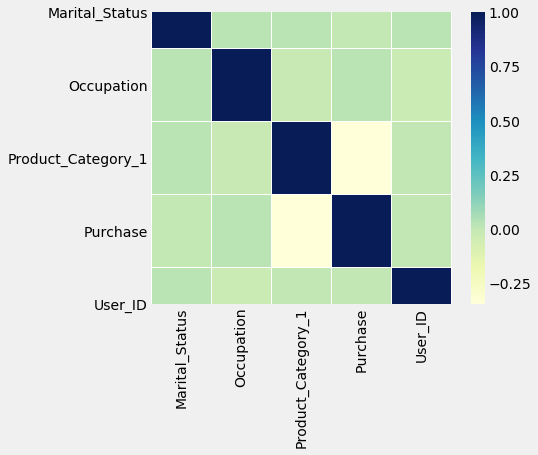

In [29]:
corrmat = df.corr()

f, ax = plt.subplots(figsize =(6, 5)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

Text(0.5, 1.0, 'Purchase amount Distribution')

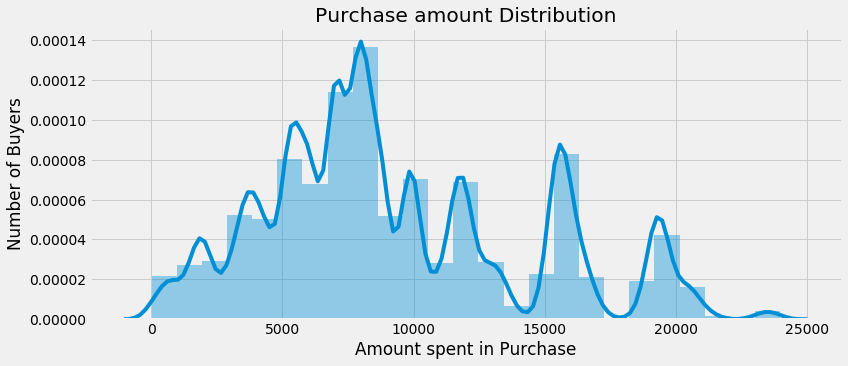

In [18]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,5))
sns.distplot(df.Purchase, bins = 25)
plt.xlabel('Amount spent in Purchase')
plt.ylabel('Number of Buyers')
plt.title('Purchase amount Distribution')

In [19]:
print ('Skew is:', train.Purchase.skew())
print('Kurtosis: %f' % train.Purchase.kurt())

Skew is: 0.6001400037087128
Kurtosis: -0.338378


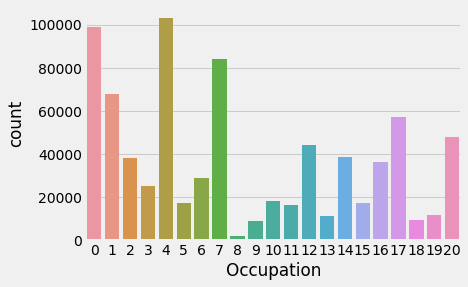

In [20]:
sns.countplot(df.Occupation)